<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Day_24_Standardization_(Date_12_06_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
#Let's rremove unnecessary columns
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [59]:
#We have to first apply train_test_split before standardizing the features
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=0)    #here df.iloc[:,-1]==df.drop(df["purchased",axis=1])
X_train.shape , Y_train.shape , X_test.shape ,Y_test.shape

((280, 2), (280,), (120, 2), (120,))

In [60]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


#StandardScaler :--

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)    #fit function only calculates
scaler.mean_ , scaler.scale_   #scale_ gives standard deviation of features

(array([3.78642857e+01, 6.98071429e+04]),
 array([1.01999375e+01, 3.45792870e+04]))

In [62]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [63]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [64]:
#since scaled coumns are forming nump array
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [65]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [66]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#Effect of Scaling :--

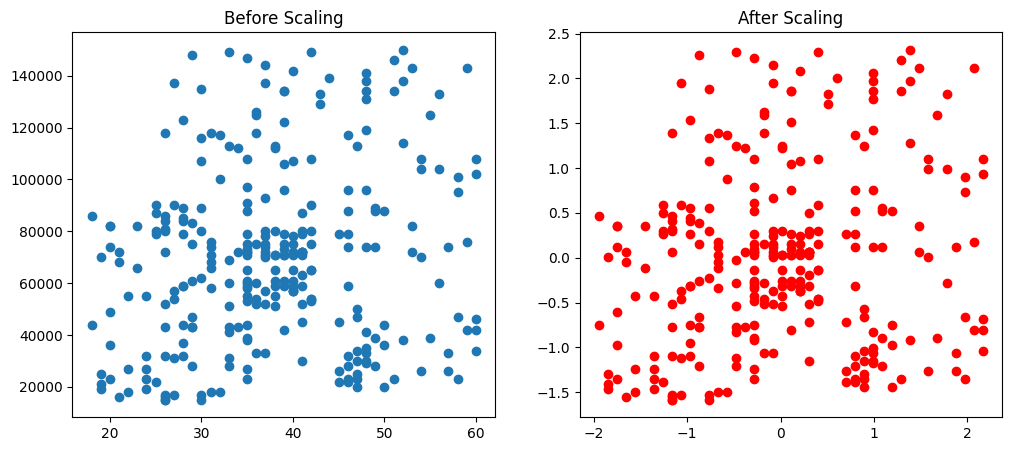

In [67]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

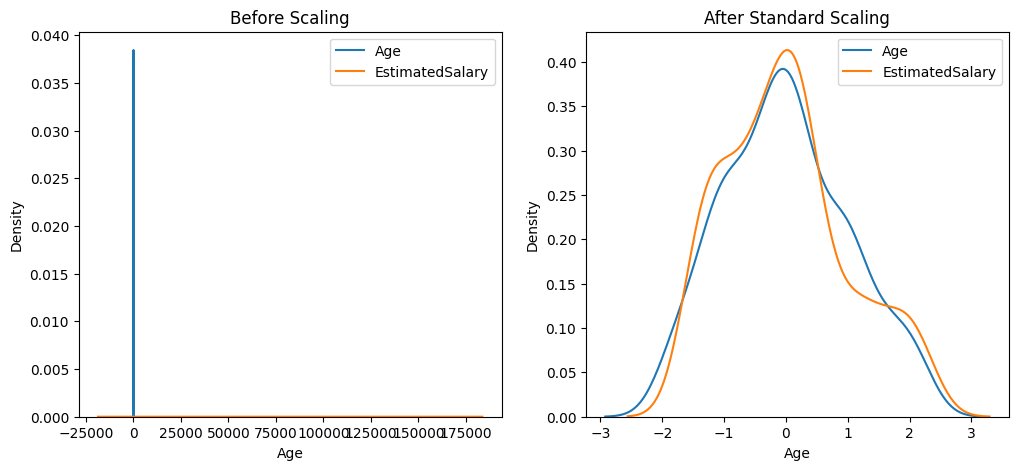

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label='EstimatedSalary')
ax1.legend()

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2,label='EstimatedSalary')
ax2.legend()
plt.show()

#Comparison of Distributions :--

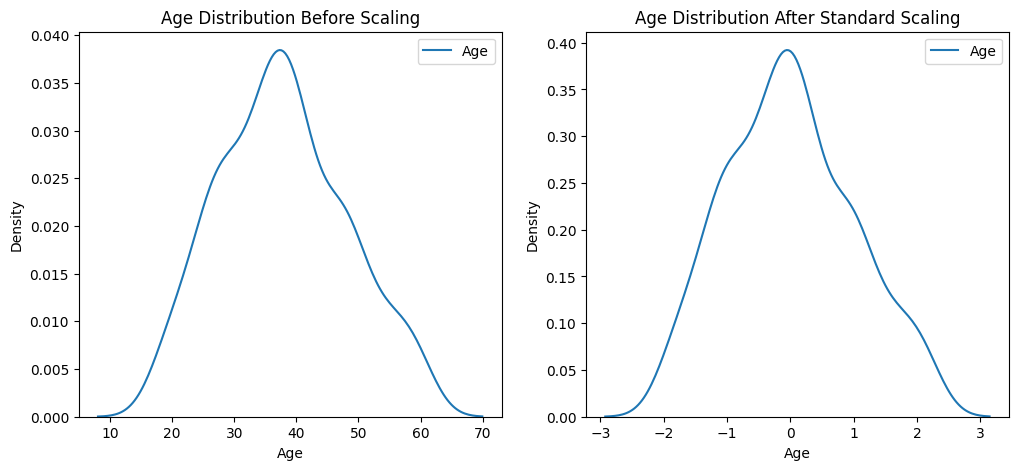

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label="Age")
ax1.legend()

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,label="Age")
ax2.legend()
plt.show()

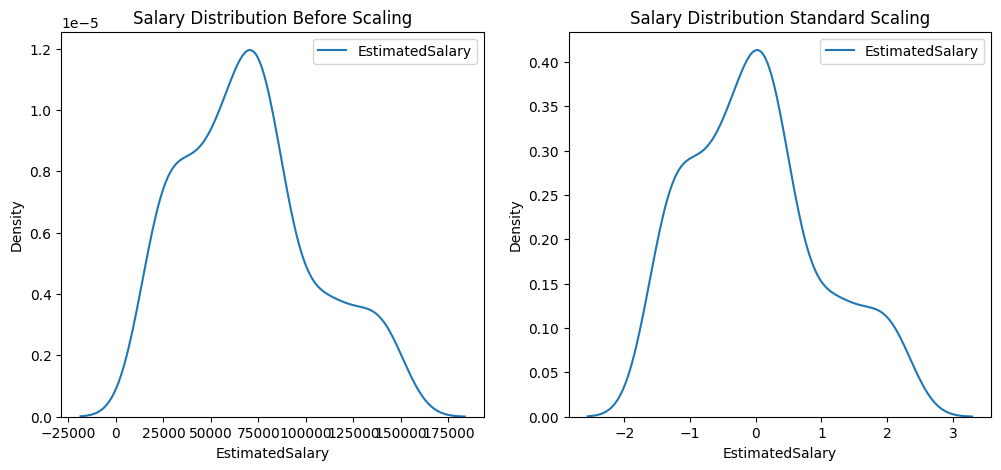

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label="EstimatedSalary")
ax1.legend()
# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2,label="EstimatedSalary")
ax2.legend()
plt.show()

#Let's See why Standardization is important :--

##- in the case of LogisticRegression :--

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [72]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [73]:
lr_scaled=LogisticRegression()
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [74]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [75]:
#let's print the accuracy score
print(f"Accuracy Score Before Scaling : {accuracy_score(Y_test,y_pred)}")
print(f"Accuracy Score After Scaling : {accuracy_score(Y_test,y_pred_scaled)}")

Accuracy Score Before Scaling : 0.6583333333333333
Accuracy Score After Scaling : 0.8666666666666667


##- in the case of DecisionTreeClassifier :--

In [76]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc_scaled=DecisionTreeClassifier()

In [77]:
dc.fit(X_train,Y_train)
dc_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [78]:
y_pred=dc.predict(X_test)
y_pred_scaled=dc_scaled.predict(X_test_scaled)

In [79]:
#let's see the accuracy score :-
print(f"Accuracy Score Before Scaling : {accuracy_score(Y_test,y_pred)}")
print(f"Accuracy Score After Scaling : {round(accuracy_score(Y_test,y_pred_scaled),3)}")

Accuracy Score Before Scaling : 0.875
Accuracy Score After Scaling : 0.867


In [80]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#Effect of outliers :-

In [86]:
df = pd.concat([df,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)     #instead of append we have to use concat
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
404,90,250000,1
405,95,350000,1
406,5,1000,0
407,90,250000,1


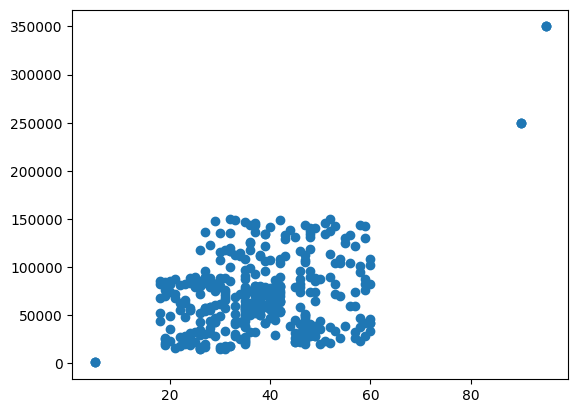

In [87]:
plt.scatter(df['Age'], df['EstimatedSalary'])


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((286, 2), (123, 2))

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

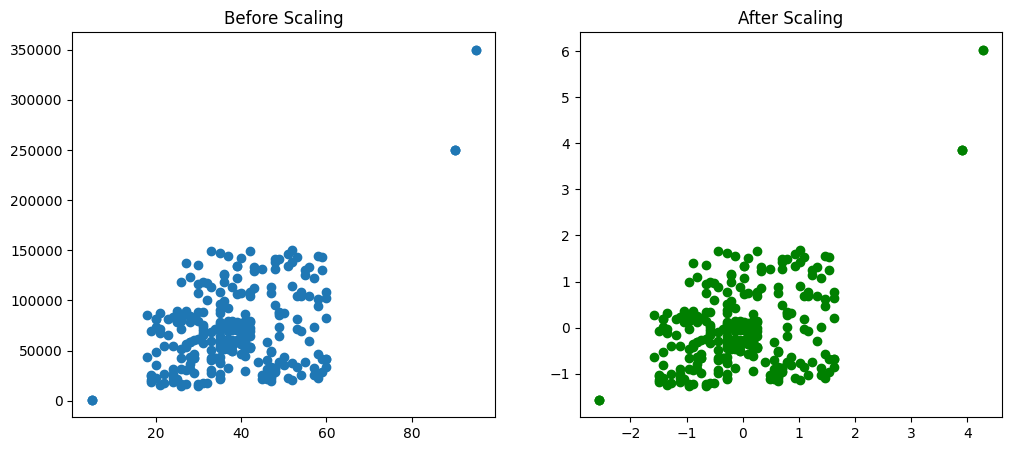

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='green')
ax2.set_title("After Scaling")
plt.show()